# CLIMADA overview

## Contents

- [Introduction](#Introduction)
    - [What is CLIMADA?](#What-is-CLIMADA)
    - [This tutorial](#This-tutorial)
    - [Resources beyond this tutorial](#Resources-beyond-this-tutorial)
- [CLIMADA features](#CLIMADA-features)
    - [CLIMADA classes](#CLIMADA-classes)
- [Tutorial: an example risk assessment](#Tutorial--an-example-risk-assessment)
    - [Hazard](#Hazard)
        - [Storm tracks](#Storm-tracks)
        - [Centroids](#Centroids)
        - [Hazard footprint](#Hazard-footprint)
    - [Entity](#Entity)
        - [Exposures](#Exposures)
        - [Impact functions](#Impact-functions)
        - [Adaptation measures](#Adaptation-measures)
        - [Discount rates](#Discount-rates)
    - [Engine](#Engine)
        - [Impact](#Impact)
        - [Adaptation options appraisal](#Adaptation-options-appraisal)
        

## Introduction

### What is CLIMADA?

CLIMADA is a fully probabilistic climate risk assessment tool. It provides a framework for users to combine exposure, hazard and vulnerability or impact data to calculate risk. Users can create probabilistic impact data from event sets, look at how climate change affects these impacts, and see how effectively adaptation measures can change them. CLIMADA also allows for studies of individual events, historical event sets and forecasts.

The model is a highly customisable, meaning that users can work with out-of-the-box data provided for different hazards, population and economic exposure, or can provide their own data for part or all of the analysis. The pre-packaged data make CLIMADA particularly useful for users who focus on just one element of risk, since CLIMADA can 'fill in the gaps' for hazard, exposure or vulnerability in the rest of the analysis.

The model core is designed to give as much flexibility as possible when describing the elements of risk, meaning that CLIMADA isn't limited to particular hazards, exposure types or impacts. We love to see the model applied to new problems and contexts.

CLIMADA provides classes, methods and data for exposure, hazard and impact functions (also called vulnerability functions), plus a financial model and a framework to analyse adaptation measures. Additional classes and data for common uses, such as economic exposures or tropical storms. Tutorials for every class are available: see the [CLIMADA features](#CLIMADA-features) section below.


### This tutorial

This tutorial is for people new to CLIMADA who want to get a high level understanding of the model and work through an example risk analysis. It will list the current features of the model, and go through a complete CLIMADA analysis to give an idea of how the model works. Other tutorials go into more detail about different model components and individual hazards.

### Resources beyond this tutorial

- [Installation guide](https://climada-python.readthedocs.io/en/stable/guide/introduction.html) - go here if you've not installed the model yet
- [CLIMADA Read the Docs home page](https://climada-python.readthedocs.io) - for all other documentation
- [List of CLIMADA's features and associated tutorials](#CLIMADA-features)
- [CLIMADA GitHub develop branch documentation](https://github.com/CLIMADA-project/climada_python/tree/develop/doc) for the very latest versions of code and documentation
- [CLIMADA paper GitHub repository](https://github.com/CLIMADA-project/climada_papers) - for publications using CLIMADA


# CLIMADA features

A risk analysis with CLIMADA can include

1. the statistical risk to your exposure from a set of events,
2. how it changes under climate change, and
3. a cost-benefit analysis of adaptation measures.

CLIMADA is flexible: the "statistical risk" above could be describing the annual expected insured flood losses to a property portfolio, the number of people displaced by an ensemble of typhoon forecasts, the annual disruption to a railway network from landslides, or changes to crop yields.

Users from risk-analysis backgrounds will be familiar with describing the impact of events by combining exposure, hazard and an impact function (or vulnerability curve) that combines the two to describe a hazard's effects. A CLIMADA analysis uses the same approach but wraps the exposures and their impact functions into a single `Entity` class, along with discount rates and adaptation options (see the below tutorials for more on CLIMADA's financial model).

CLIMADA's `Impact` object is used to analyse events and event sets, whether this is the impact of a single wildfire, or the global economic risk from tropical cyclones in 2100.

### CLIMADA classes

This is a full directory of tutorials for CLIMADA's classes to use as a reference. You don't need to read all this to do this tutorial, but it may be useful to refer back to.

- [**Hazard**](https://climada-python.readthedocs.io/en/latest/tutorial/climada_hazard_Hazard.html): a class that stores sets of geographic hazard footprints, (e.g. for wind speed, water depth and fraction, drought index), and metadata including event frequency. Several predefined extensions to create particular hazards from particular datasets and models are included with CLIMADA:
   - [Tropical cyclone wind](https://climada-python.readthedocs.io/en/latest/tutorial/climada_hazard_TropCyclone.html): global hazard sets for tropical cyclone events, constructing statistical wind fields from storm tracks. Subclasses include methods and data to calculate historical wind footprints, create forecast enembles from ECMWF tracks, and create climatological event sets for different climate scenarios.
   - [Storm surge](https://climada-python.readthedocs.io/en/latest/tutorial/climada_hazard_TCSurgeGeoClaw.html): (under development) global surge hazard for tropical storms. Runs the GeoClaw surge model to create and plot hazard from tropical storm tracks
   - [European windstorms](https://climada-python.readthedocs.io/en/latest/tutorial/climada_hazard_StormEurope.html): includes methods to read and plot footprints from the Copernicus WISC dataset and for DWD and ICON forecasts.
   - [River flooding](https://climada-python.readthedocs.io/en/latest/tutorial/climada_hazard_RiverFlood.html): global water depth hazard for flood, including methods to work with ISIMIP simulations.
   - [Crop modelling](https://climada-python.readthedocs.io/en/latest/tutorial/climada_hazard_entity_Crop.html): combines ISIMIP crop simulations and UN Food and Agrigultre Organization data. The module uses crop production as exposure, with hydrometeorological 'hazard' increasing or decreasing production. 
   - Wildfire (global): tutorial under development
   - Drought (global): tutorial under development

- [**Entity**](#Entity): this is a container that groups CLIMADA's socio-economic models. It's is where the Exposures and Impact Functions are stored, which can then be combined with a hazard for a risk analysis (using the Engine's Impact class). It is also where Discount Rates and Measure Sets are stored, which are used in adaptation cost-benefit analyses (using the Engine's CostBenefit class):
   - [Exposures](https://climada-python.readthedocs.io/en/latest/tutorial/climada_entity_Exposures.html): geolocated exposures. Each exposure is associated with a value (which can be a dollar value, population, crop yield, etc), information to associate it with impact functions for the relevant hazard(s) (in the Entity's ImpactFuncSet), a geometry, and other optional properties such as deductables and cover. Exposures can be loaded from a file, specified by the user, or created from regional economic models accessible within CLIMADA, for example: 
      - [LitPop](https://climada-python.readthedocs.io/en/latest/tutorial/climada_entity_LitPop.html): regional economic model using nightlight and population maps together with several economic indicators
      - [BlackMarble](https://climada-python.readthedocs.io/en/latest/tutorial/climada_entity_BlackMarble.html): regional economic model from nightlight intensities and economic indicators (GDP, income group). Largely succeeded by LitPop.
      - [OpenStreetMap](https://climada-python.readthedocs.io/en/latest/tutorial/climada_entity_openstreetmap.html): methods to create exposures from data available through the OpenStreetMap API    
   - [ImpactFuncSet](https://climada-python.readthedocs.io/en/latest/tutorial/climada_entity_ImpactFuncSet.html): functions to describe the impacts that hazards have on exposures, expressed in terms of  e.g. the % dollar value of a building lost as a function of water depth, or the mortality rate for over-70s as a function of temperature. CLIMADA provides some common impact functions, or they can be user-specified. The following is an incomplete list:
      - ImpactFunc: a basic adjustable impact function, specified by the user
      - IFTropCyclone: impact functions for tropical cyclone winds
      - IFRiverFlood: impact functions for river floods
      - IFStormEurope: impact functions for European windstorms    
   - [DiscRates](https://climada-python.readthedocs.io/en/latest/tutorial/climada_entity_DiscRates.html): discount rates per year
   - [MeasureSet](https://climada-python.readthedocs.io/en/latest/tutorial/climada_entity_MeasureSet.html): a collection of Measure objects that together describe any adaptation measures being modelled. Adaptation measures are described by their cost, and how they modify exposure, hazard, and impact functions (and have have a method to do these things). Measures also include risk transfer options.
      
- [**Engine**](https://climada-python.readthedocs.io/en/latest/tutorial/climada_engine_Impact.html): the CLIMADA Engine contains the Impact and CostBenefit classes, which are where the main model calculations are done, combining Hazard and Entity objects.
    - [Impact](https://climada-python.readthedocs.io/en/latest/tutorial/climada_engine_Impact.html): a class that stores CLIMADA's modelled impacts and the methods to calculate them from Exposure, Impact Function and Hazard classes. The calculations include average annual impact, expected annual impact by exposure item, total impact by event, and (optionally) the impact of each event on each exposure point. Includes statistical and plotting routines for common analysis products.
    - [CostBenefit](https://climada-python.readthedocs.io/en/stable/tutorial/1_main_climada.html#Adaptation-options-appraisal): a class to appraise adaptation options. It uses an Entity's MeasureSet to calculate new Impacts based on their adjustments to hazard, exposure, and impact functions, and returns statistics and plotting routines to express cost-benefit comparisons.

This list will be updated periodically along with new CLIMADA releases. To see the latest, development version of all tutorials, see the [tutorials page on the CLIMADA GitHub](https://github.com/CLIMADA-project/climada_python/tree/develop/doc/tutorial).

# Tutorial: an example risk assessment

This example will work through a risk assessment for tropical storm wind in Puerto Rico, constructing hazard, exposure and vulnerability and combining them to create an Impact object. Everything you need for this is included in the main CLIMADA installation and additional data will be downloaded by the scripts as required.

## Hazard

Hazards are characterized by their frequency of occurrence and the geographical distribution of their intensity. The `Hazard` class collects events of the same hazard type (e.g. tropical cyclone, flood, drought, ...) with intensity values over the same geographic centroids. They might be historical events or synthetic.

See the [Hazard tutorial](climada_hazard_Hazard.ipynb) to learn about the Hazard class in more detail, and the [CLIMADA features](#CLIMADA-features) section of this document to explore tutorials for different hazards, including
[tropical cyclones](climada_hazard_TropCyclone.ipynb), as used here.

Tropical cyclones in CLIMADA and the `TropCyclone` class work like any hazard, storing each event's wind speeds at the geographic centroids specified for the class. Pre-calculated hazards can be loaded from files (see the [full Hazard tutorial](climada_hazard_Hazard.ipynb), but they can also be modelled from a storm track using the `TCTracks` class, based on a storm's parameters at each time step. This is how we'll construct the hazards for our example.

So before we create the hazard, we will create our storm tracks and define the geographic centroids for the locations we want to calculate hazard at.

### Storm tracks

Storm tracks are created and stored in a separate class, `TCTracks`. We use its method `read_ibtracs_netcdf` to create the tracks from the [IBTRaCS](https://www.ncdc.noaa.gov/ibtracs/) storm tracks archive. The first time this runs on your machine it will need to download the full dataset which might take a little time. See the [full TropCyclone tutorial](climada_hazard_TropCyclone.ipynb) for more detail and troubleshooting.

In [1]:
import numpy as np
from climada.hazard import TCTracks

tracks = TCTracks()
tracks.read_ibtracs_netcdf(provider='usa', basin='NA')

2021-04-01 13:57:05,661 - climada.hazard.tc_tracks - WARNING - 57 storm events are discarded because no valid wind/pressure values have been found: 1980199N31284, 1980200N25270, 1980204N23287, 1980226N15339, 1980238N16328, ...
2021-04-01 13:57:06,854 - climada.hazard.tc_tracks - INFO - Progress: 10%
2021-04-01 13:57:07,847 - climada.hazard.tc_tracks - INFO - Progress: 20%
2021-04-01 13:57:08,833 - climada.hazard.tc_tracks - INFO - Progress: 30%
2021-04-01 13:57:09,823 - climada.hazard.tc_tracks - INFO - Progress: 40%
2021-04-01 13:57:10,807 - climada.hazard.tc_tracks - INFO - Progress: 50%
2021-04-01 13:57:11,860 - climada.hazard.tc_tracks - INFO - Progress: 60%
2021-04-01 13:57:12,893 - climada.hazard.tc_tracks - INFO - Progress: 70%
2021-04-01 13:57:13,896 - climada.hazard.tc_tracks - INFO - Progress: 81%
2021-04-01 13:57:14,946 - climada.hazard.tc_tracks - INFO - Progress: 91%
2021-04-01 13:57:15,748 - climada.hazard.tc_tracks - INFO - Progress: 100%


This will load all historical tracks in the North Atlantic into the `tracks` object (since we set `basin='NA'`). The `TCTracks.plot` method will plot the downloaded tracks, though there are too many for the plot to be very useful:

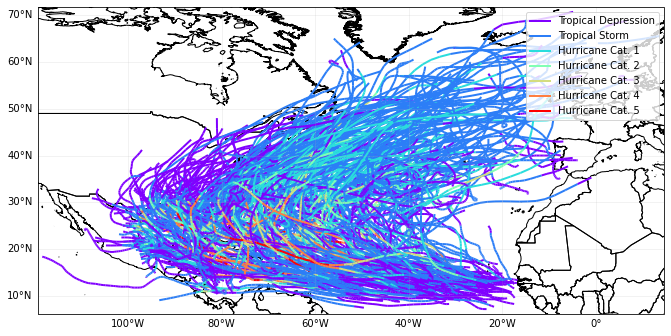

In [2]:
tracks.plot()

It's also worth adding additional time steps to the tracks (though this can be memory intensive!). Most tracks are reported at 3-hourly intervals (plus a frame at landfall). Event footprints are calculated as the maximum wind from any time step. For a fast-moving storm these combined three-hourly footprints give quite a rough event footprint, and it's worth adding extra frames to smooth the footprint artificially (try running this notebook with and without this interpolation to see the effect): 

In [3]:
tracks.equal_timestep(time_step_h=0.5)

2021-04-01 13:57:49,457 - climada.hazard.tc_tracks - INFO - Interpolating 543 tracks to 0.5h time steps.


Now, irresponsibly for a risk analysis, we're only going to use these historical events: they're enough to demonstrate CLIMADA in action. A proper risk analysis would  expand it to include enough events for a statistically robust climatology. See the [full TropCyclone tutorial](climada_hazard_TropCyclone.ipynb) for CLIMADA's stochastic event generation.

### Centroids

A hazard's centroids can be any set of locations where we want the hazard to be evaluated. This could be the same as the locations of your exposure, though commonly it is on a regular lat-lon grid (with hazard being imputed to exposure between grid points).

Here we'll set the centroids as a 0.1 degree grid covering Puerto Rico. Centroids are defined by a `Centroids` class, which has the `set_raster_from_pnt_bounds` method for generating regular grids and a `plot` method to inspect the centroids.

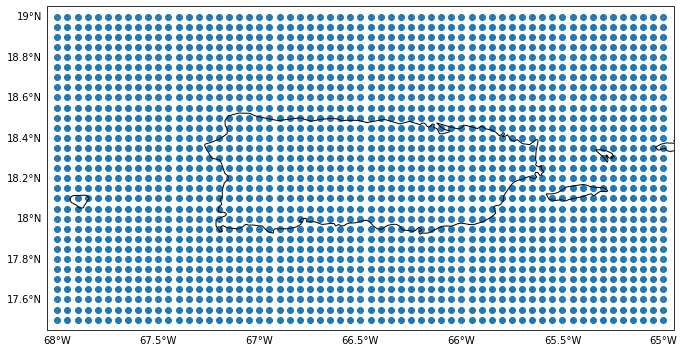

In [4]:
from climada.hazard import Centroids

min_lat, max_lat, min_lon, max_lon = 17.5, 19.0, -68.0, -65.0
cent = Centroids()
cent.set_raster_from_pnt_bounds((min_lon, min_lat, max_lon, max_lat), res=0.05)
cent.check()
cent.plot()

Almost every class in CLIMADA has a `check()` method, as used above. This verifies that the necessary data for an objet is correctly provided and logs the optional variables that are not present. It is always worth running it after filling an instance of an object.

### Hazard footprint

Now we're ready to create our hazard object. This will be a `TropCyclone` class, which inherits from the `Hazard` class, and has the `set_from_tracks` method to create hazard from a `TCTracks` object at given centroids.

In [5]:
from climada.hazard import TropCyclone

haz = TropCyclone()
haz.set_from_tracks(tracks, cent)
haz.check()

2021-04-01 13:58:06,255 - climada.hazard.centroids.centr - INFO - Convert centroids to GeoSeries of Point shapes.


C:\Users\ThomasRoosli\anaconda3\envs\climada_env_20210315\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-04-01 13:58:07,151 - climada.util.coordinates - INFO - dist_to_coast: UTM 32619 (1/2)


C:\Users\ThomasRoosli\anaconda3\envs\climada_env_20210315\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\ThomasRoosli\anaconda3\envs\climada_env_20210315\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-04-01 13:58:07,884 - climada.util.coordinates - INFO - dist_to_coast: UTM 32620 (2/2)


C:\Users\ThomasRoosli\anaconda3\envs\climada_env_20210315\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\ThomasRoosli\anaconda3\envs\climada_env_20210315\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-04-01 13:58:08,383 - climada.hazard.trop_cyclone - INFO - Mapping 543 tracks to 1891 coastal centroids.
2021-04-01 13:58:10,412 - climada.hazard.trop_cyclone - INFO - Progress: 10%
2021-04-01 13:58:11,935 - climada.hazard.trop_cyclone - INFO - Progress: 20%
2021-04-01 13:58:13,203 - climada.hazard.trop_cyclone - INFO - Progress: 30%
2021-04-01 13:58:15,444 - climada.hazard.trop_cyclone - INFO - Progress: 40%
2021-04-01 13:58:16,731 - climada.hazard.trop_cyclone - INFO - Progress: 50%
2021-04-01 13:58:18,419 - climada.hazard.trop_cyclone - INFO - Progress: 60%
2021-04-01 13:58:20,209 - climada.hazard.trop_cyclone - INFO - Progress: 70%
2021-04-01 13:58:21,976 - climada.hazard.trop_cyclone - INFO - Progress: 81%
2021-04-01 13:58:23,778 - climada.hazard.trop_cyclone - INFO - Progress: 91%
2021-04-01 13:58:25,569 - climada.hazard.trop_cyclone - INFO - Progress: 100%


In 2017 Hurricane Maria devastated Puerto Rico. In the IBTRaCs event set, it has ID `2017260N12310` (we use this rather than the name, as IBTRaCS contains three North Atlantic storms called Maria). We can plot the track:

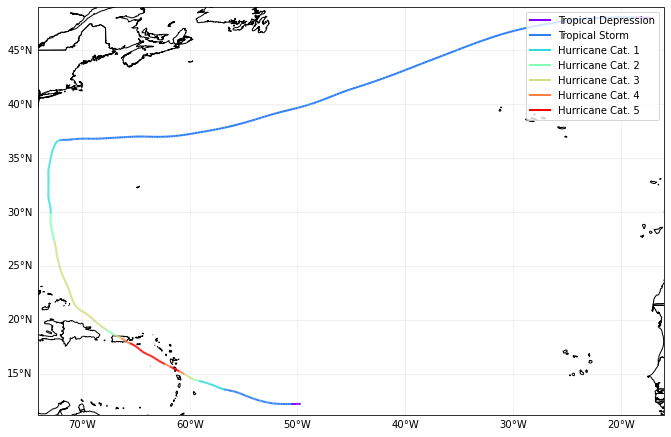

In [6]:
tracks.subset({"sid": "2017260N12310"}).plot()  # This is how we subset a TCTracks object

And plot the hazard on our centroids for Puerto Rico:

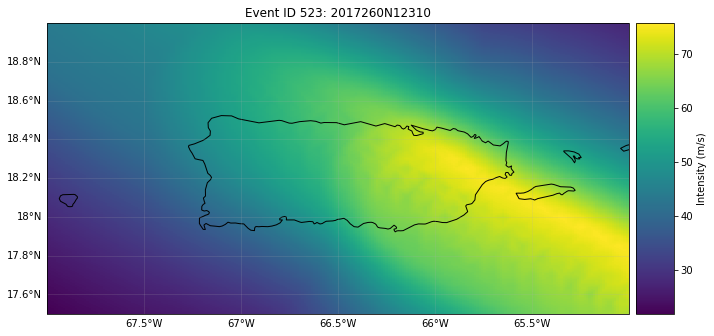

In [7]:
haz.plot_intensity(event='2017260N12310')

A Hazard object also lets us plot the hazard at different return periods. The IBTRaCS archive produces footprints from 1980 onwards (CLIMADA discarded earlier events) and so the historical period is short. Therefore these plots don't make sense as 'real' return periods, but we're being irresponsible and demonstrating the functionality anyway.

2021-04-01 13:58:31,755 - climada.hazard.base - WARNING - Return period 40.0 exceeds max. event return period.
2021-04-01 13:58:31,757 - climada.hazard.base - INFO - Computing exceedance intenstiy map for return periods: [ 5 10 20 40]


(array([[<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x0000020DB658AE80>,
       dtype=object),
 array([[24.67411181, 24.82109692, 24.98683063, ..., 29.29464182,
         29.67756411, 29.9150518 ],
        [31.69842124, 31.8197121 , 31.96135634, ..., 42.21941388,
         43.0336463 , 43.2747222 ],
        [38.72273067, 38.81832728, 38.93588204, ..., 55.14418595,
         56.38972848, 56.63439259],
        [45.7470401 , 45.81694246, 45.91040775, ..., 68.06895802,
         69.74581066, 69.99406298]]))

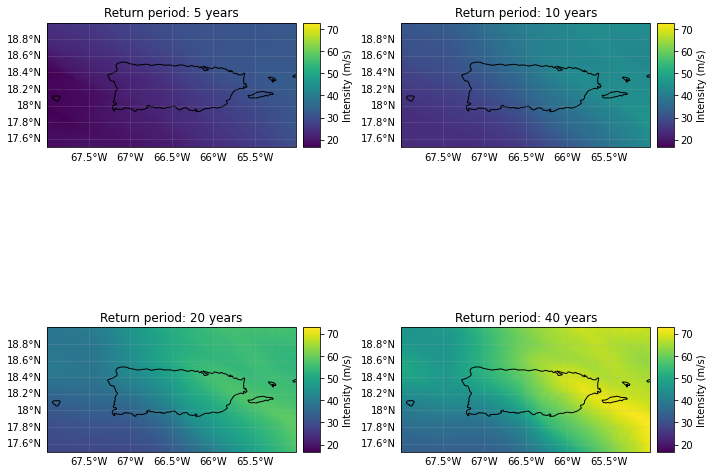

In [8]:
haz.plot_rp_intensity(return_periods=(5,10,20,40))

See the [TropCyclone tutorial](climada_hazard_TropCyclone.ipynb) for full details of the TropCyclone hazard class.

We can also recalculate event sets to reflect the effects of climate change. The `set_climate_scenario_knu` method applies changes in intensity and frequency projected due to climate change, as described in 'Global projections of intense tropical cyclone activity for the late twenty-first century from dynamical downscaling of CMIP5/RCP4.5 scenarios' (Knutson _et al._ 2015). See the [tutorial](climada_hazard_TropCyclone.ipynb) for details.

>**Exercise:** Extend this notebook's analysis to examine the effects of climate change in Puerto Rico. You'll need to extend the historical event set with stochastic tracks to create a robust statistical storm climatology - the `TCTracks` class has the functionality to do this. Then you can apply the `set_climate_scenario_knu` method to the generated hazard object to create a second hazard climatology representing storm activity under climate change. See how the results change using the different hazard sets.

Next we'll work on exposure and vulnerability, part of the Entity class.

## Entity

The entity class is a container class that stores exposures and impact functions (vulnerability curves) needed for a risk calculation, and the discount rates and adaptation measures for an adaptation cost-benefit analysis.

As with Hazard objects, Entities can be read from files or created through code. The Excel template can be found in `climada_python/data/system/entity_template.xlsx`.

In this tutorial we will create an Exposure object using the LitPop economic exposure module, and load a pre-defined wind damage function.

First we create an empty Entity object:

In [9]:
from climada.entity import Entity

ent = Entity()

2021-04-01 13:58:36,963 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-04-01 13:58:36,964 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-04-01 13:58:36,966 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-04-01 13:58:36,966 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-04-01 13:58:36,968 - climada.entity.exposures.base - INFO - crs set to default value: EPSG:4326


C:\shortpaths\GitHub\climada_python\climada\entity\exposures\base.py:219: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf.crs = self.meta['crs']


### Exposures

The `Entity`'s `exposures` attribute contains geolocalized values of anything exposed to the hazard, whether monetary values of assets or number of human lifes, for example. It is of type `Exposures`. 

See the [Exposures tutorial](climada_entity_Exposures.ipynb) for more detail on the structure of the class, and how to create and import exposures. The [LitPop tutorial](climada_entity_LitPop.ipynb) explains how CLIMADA models economic exposures using night-time light and economic data, and is what we'll use here. To combine your exposure with OpenStreetMap's data see the [OSM tutorial](climada_entity_openstreetmap.ipynb).

LitPop is a module that allows CLIMADA to estimate exposed populations and economic assets at any point on the planet without additional information, and in a globally consistent way. Here we can create an economic Exposure dataset for Puerto Rico, add it to our Entity, and plot it:

2021-04-01 13:58:37,007 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-04-01 13:58:37,009 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-04-01 13:58:37,009 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-04-01 13:58:37,010 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-04-01 13:58:37,012 - climada.entity.exposures.base - INFO - crs set to default value: EPSG:4326
2021-04-01 13:58:38,631 - climada.entity.exposures.litpop - INFO - Generating LitPop data at a resolution of 120 arcsec.
2021-04-01 13:58:57,017 - climada.entity.exposures.gpw_import - INFO - Reference year: 2016. Using nearest available year for GWP population data: 2015
2021-04-01 13:58:57,018 - climada.entity.exposures.gpw_import - INFO - GPW Version v4.11
2021-04-01 13:59:11,407 - climada.util.finance - WARNING - No data available for country. Using non-financial wealth instead
2021

C:\shortpaths\GitHub\climada_python\climada\entity\exposures\base.py:219: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf.crs = self.meta['crs']
C:\shortpaths\GitHub\climada_python\climada\entity\exposures\base.py:752: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  exp.gdf = GeoDataFrame(
C:\Users\ThomasRoosli\anaconda3\envs\climada_env_20210315\lib\site-packages\geopandas\geodataframe.py:167: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super(GeoDataFrame, self).__setattr__(attr, val)
C:\shortpaths\GitHub\climada_python\climada\entity\exposures\base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
 

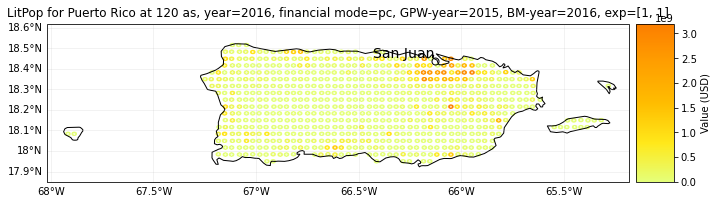

In [10]:
from climada.entity.exposures import LitPop

exp_litpop = LitPop()
exp_litpop.set_country('Puerto Rico', res_arcsec = 120)  # We'll go lower resolution than default to keep it simple
exp_litpop.set_geometry_points() # Set geodataframe geometries from lat lon data

ent.exposures = exp_litpop

exp_litpop.plot_hexbin(pop_name=True, linewidth=4, buffer=0.1)

LitPop's default exposure is measured in US Dollars, with a reference year depending on the most recent data available.

Once we've created our impact function we will come back to this Exposure and give it the parameters needed to connect exposure to impacts. 

### Impact functions

Impact functions describe a relationship between a hazard's intensity and your exposure in terms of a percentage loss. The impact is described through two terms. The Mean Degree of Damage (MDD) gives the percentage of an exposed asset's numerical value that's affected as a function of intensity, such as the damage to a building from wind in terms of its total worth. Then the Proportion of Assets Affected (PAA) gives the fraction of exposures that are affected, such as the mortality rate in a population from a heatwave. These multiply to give the Mean Damage Ratio (MDR), the average impact to an asset.

Impact functions are stored as the Entity's `impact_funcs` attribute, in an instance of the `ImpactFuncSet` class which groups one or more `ImpactFunc` objects. They can be specified manually, read from a file, or you can use CLIMADA's pre-defined impact functions. We'll use a pre-defined function for tropical storm wind damage stored in the `IFTropCyclone` class. 

See the [Impact Functions tutorial](climada_entity_ImpactFuncSet.ipynb) for a full guide to the class, including how data are stored and reading and writing to files.

We initialise an Impact Function with the `IFTropCyclone` class, and use its `set_emanuel_usa` method to load the Emanuel (2011) impact function. (The class also contains regional impact functions for the full globe, but we'll won't use these for now.) The class's `plot` method visualises the function, which we can see is expressed just through the Mean Degree of Damage, with all assets affected.

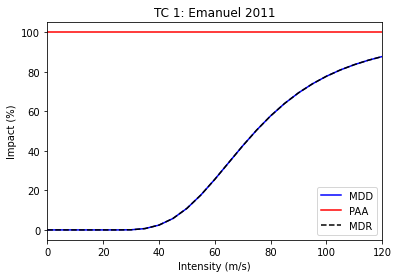

In [11]:
from climada.entity.impact_funcs import ImpactFuncSet, IFTropCyclone

imp_fun = IFTropCyclone()
imp_fun.set_emanuel_usa()
imp_fun.plot()

The plot title also includes information about the function's ID, which were also set by the `set_emanuel_usa` method. The hazard is "TC" and the function ID is 1. Since a study might use several impact functions - for different hazards, or for different types of exposure.

We then create an `ImpactFuncSet` object to store the impact function. This is a container class, and groups a study's impact functions together. Studies will often have several impact functions, due to multiple hazards, multiple types of exposure that are impacted differently, or different adaptation scenarios. We add it to our Entity object.

In [12]:
imp_fun_set = ImpactFuncSet()
imp_fun_set.append(imp_fun)

ent.impact_funcs = imp_fun_set

Finally, we can update our LitPop exposure to point to the TC 1 impact function. This is done by adding a column to the exposure:

In [13]:
ent.exposures.gdf['if_TC'] = 1
ent.check()

2021-04-01 13:59:14,328 - climada.entity.exposures.base - INFO - Hazard type not set in if_
2021-04-01 13:59:14,329 - climada.entity.exposures.base - INFO - category_id not set.
2021-04-01 13:59:14,330 - climada.entity.exposures.base - INFO - cover not set.
2021-04-01 13:59:14,331 - climada.entity.exposures.base - INFO - deductible not set.
2021-04-01 13:59:14,332 - climada.entity.exposures.base - INFO - centr_ not set.
2021-04-01 13:59:14,333 - climada.entity.impact_funcs.base - WARNING - For intensity = 0, mdd != 0 or paa != 0. Consider shifting the origin of the intensity scale. In impact.calc the impact is always null at intensity = 0.


Here the `if_TC` column tells the CLIMADA engine that for a tropical cyclone (TC) hazard, it should use the first impact function defined for TCs. We use the same impact function for all of our exposure.

This is now everything we need for a risk analysis, but while we're working on the Entity class, we can define the adaptation measures and discount rates needed for an adaptation analysis. If you're not interested in the cost-benefit  analysis, you can skip ahead to the [Impact section](#Impact)

### Adaptation measures

CLIMADA's adaptation measures describe possible interventions that would change event hazards and impacts, and the cost of these interventions.

They are stored as `Measure` objects within a `MeasureSet` container class (similarly to `ImpactFuncSet` containing several `ImpactFunc`s), and are assigned to the `measures` attribute of the Entity.

See the [Adaptation Measures tutorial](climada_entity_MeasureSet.ipynb) on how to create, read and write measures. CLIMADA doesn't yet have pre-defined adaptation measures, mostly because they are hard to standardise.

The best way to understand an adaptation measure is by an example. Here's a possible measure for the creation of coastal mangroves (ignore the exact numbers, they are just for illustration):

In [14]:
from climada.entity import Measure, MeasureSet

meas_mangrove = Measure()
meas_mangrove.name = 'Mangrove'
meas_mangrove.haz_type = 'TC'
meas_mangrove.color_rgb = np.array([0.2, 0.2, 0.7])
meas_mangrove.cost = 500000000
meas_mangrove.mdd_impact = (1, 0)
meas_mangrove.paa_impact = (1, -0.15)
meas_mangrove.hazard_inten_imp = (1, -10)

meas_set = MeasureSet()
meas_set.append(meas_mangrove)
meas_set.check()

What values have we set here?
- The `haz_type` gives the hazard that this measure affects.
- The `cost` is a flat price that will be used in cost-benefit analyses.
- The `mdd_impact`, `paa_impact`, and `hazard_inten_imp` attributes are all tuples that describes a linear transformation to event hazard, the impact function's mean damage degree and the impact function's proportion of assets affected. The tuple `(a, b)` describes a scalar multiplication of the function and a constant to add. So `(1, 0)` is unchanged, `(1.1, 0)` increases values by 10%, and `(1, -10)` decreases all values by 10.

So the Mangrove example above costs 50,000,000 USD, protects 15% of assets from any impact at all (`paa_impact = (1, -0.15)`) and decreases the (effective) hazard intensity by 10 m/s (`hazard_inten_imp = (1, -10)`.



We can apply these measures to our existing Exposure, Hazard and Impact functions, and plot the old and new impact functions:

Text(0.5, 1.0, 'TC: Modified impact function')

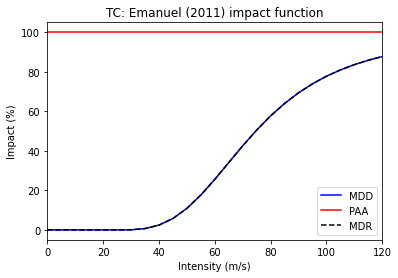

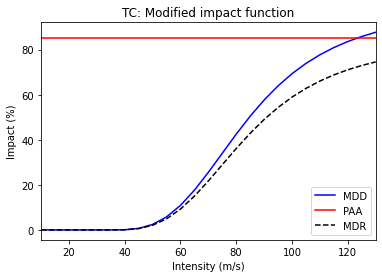

In [15]:
mangrove_exp, mangrove_imp_fun_set, mangrove_haz = meas_mangrove.apply(exp_litpop, imp_fun_set, haz)
axes1 = imp_fun_set.plot()
axes1.set_title('TC: Emanuel (2011) impact function')
axes2 = mangrove_imp_fun_set.plot()
axes2.set_title('TC: Modified impact function')

Let's define a second measure. Again, the numbers here are made up, for illustration only.

In [16]:
meas_buildings = Measure()
meas_buildings.name = 'Building code'
meas_buildings.haz_type = 'TC'
meas_buildings.color_rgb = np.array([0.2, 0.7, 0.5])
meas_buildings.cost = 100000000
meas_buildings.hazard_freq_cutoff = 0.1

meas_set.append(meas_buildings)
meas_set.check()

buildings_exp, buildings_imp_fun_set, buildings_haz = meas_buildings.apply(exp_litpop, imp_fun_set, haz)

2021-04-01 13:59:14,748 - climada.entity.exposures.base - INFO - Matching 691 exposures with 1891 centroids.
2021-04-01 13:59:14,751 - climada.engine.impact - INFO - Calculating damage for 682 assets (>0) and 543 events.


This measure describes an upgrade to building codes to withstand 10-year events. The measure costs 100,000,000 USD and, through `hazard_freq_cutoff = 0.1`, removes events with calculated impacts below the 10-year return period. 

The [Adaptation Measures tutorial](climada_entity_MeasureSet.ipynb) descibes other parameters for describing adaptation measures, including risk transfer, assigning measures to subsets of exposure, and reassigning impact functions.

We can compare the 5- and 20-year return period hazard (remember: not a real return period due to the small event set!) compared to the adjusted hazard once low-impact events are removed.

2021-04-01 13:59:14,766 - climada.hazard.base - INFO - Computing exceedance intenstiy map for return periods: [ 5 20]
2021-04-01 13:59:15,795 - climada.hazard.base - INFO - Computing exceedance intenstiy map for return periods: [ 5 20]
2021-04-01 13:59:16,082 - climada.hazard.base - WARNING - Exceedance intenstiy values below 0 are set to 0.                    Reason: no negative intensity values were found in hazard.


(array([<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x0000020DB37D6F40>,
       dtype=object),
 array([[10.07052679, 10.60037616, 11.09543039, ..., 15.25068104,
         14.31129139, 16.09303176],
        [33.93129517, 34.13824911, 34.33440028, ..., 51.221401  ,
         52.04539266, 52.31093976]]))

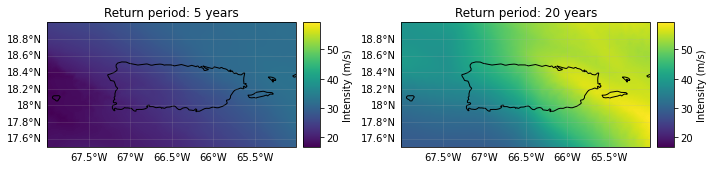

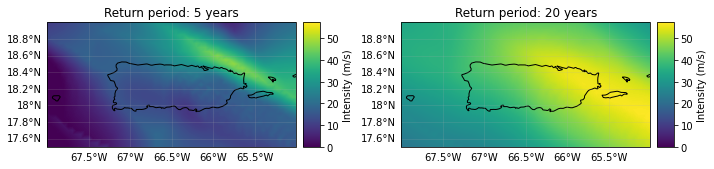

In [17]:
haz.plot_rp_intensity(return_periods=(5, 20))
buildings_haz.plot_rp_intensity(return_periods=(5, 20))

It shows there are now very few events at the 5-year return period - the new building codes removed most of these from the event set. Finally we add the measure set to our Entity.

In [18]:
ent.measures = meas_set

### Discount rates

The `disc_rates` attribute is of type `DiscRates`. This class contains the discount rates for the following years and computes the net present value for given values.

See the [Discount Rates tutorial](climada_entity_DiscRates.ipynb) for more details about creating, reading and writing the `DiscRates` class, and how it is used in calculations.

Here we will implement a simple, flat 2% discount rate.

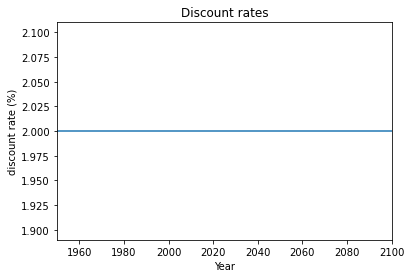

In [19]:
from climada.entity import DiscRates

disc = DiscRates()
disc.years = np.arange(1950, 2101)
disc.rates = np.ones(disc.years.size) * 0.02
disc.check()
disc.plot()

ent.disc_rates = disc

We are now ready to move to the last part of the CLIMADA model for Impact and Cost Benefit analyses.

## Engine

The CLIMADA Engine is where the main risk calculations are done. It contains two classes, `Impact`, for risk assessments, and `CostBenefit`, to evaluate adaptation measures.

### Impact

Let us compute the impact of historical tropical cyclones in Puerto Rico.

Our work above has given us everything we need for a risk analysis using the Impact class. By computing the impact for each historical event, the `Impact` class provides different risk measures, as the expected annual impact per exposure, the probable maximum impact for different return periods and the total average annual impact.

Note: the configurable parameter `MAX_SIZE` controls the maximum matrix size contained in a chunk. You can decrease its value if you are having memory issues when using the `Impact`'s `calc` method. A high value will make the computation fast, but increase the memory use. The configuration file is located at `climada_python/climada/conf/defaults.conf`.

CLIMADA calculates impacts by providing exposures, impact functions and hazard to an `Impact` object's `calc` method:

In [20]:
from climada.engine import Impact

imp = Impact()
imp.calc(ent.exposures, ent.impact_funcs, haz)

2021-04-01 13:59:20,376 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-04-01 13:59:20,379 - climada.engine.impact - INFO - Calculating damage for 682 assets (>0) and 543 events.


A useful parameter for the `calc` method is `save_mat`. When set to `True` (default is `False`), the `Impact` object saves the calculated impact for each event at each point of exposure, stored as a (large) sparse matrix in the `imp_mat` attribute. This allows for more detailed analysis at the event level.

The `Impact` class includes a number of analysis tools. We can plot an exceedence frequency curve, showing us how often different damage thresholds are reached in our source data (remember this is only 40 years of storms, so not a full climatology!)

Expected average annual impact: 1.754e+09 USD


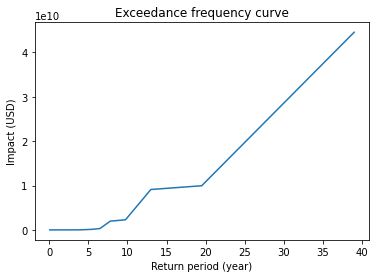

In [21]:
freq_curve = imp.calc_freq_curve() # impact exceedence frequency curve
freq_curve.plot();

print('Expected average annual impact: {:.3e} USD'.format(imp.aai_agg))

We can map the expected annual impact by exposure:

2021-04-01 13:59:20,522 - climada.util.coordinates - INFO - Setting geometry points.
2021-04-01 13:59:20,675 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.


C:\shortpaths\GitHub\climada_python\climada\entity\exposures\base.py:188: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf = GeoDataFrame(*args, **kwargs)
C:\Users\ThomasRoosli\anaconda3\envs\climada_env_20210315\lib\site-packages\contextily\tile.py:265: FutureWarning: The url format using 'tileX', 'tileY', 'tileZ' as placeholders is deprecated. Please use '{x}', '{y}', '{z}' instead.
  warnings.warn(


2021-04-01 13:59:23,131 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.


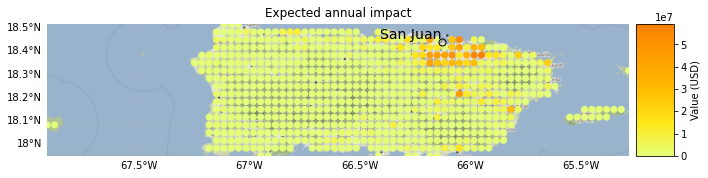

In [22]:
imp.plot_basemap_eai_exposure(buffer=0.1); # average annual impact at each exposure

For additional functionality, including plotting the impacts of individual events, see the [Impact tutorial](climada_engine_Impact.ipynb).

>**Exercise:** Plot the impacts of Hurricane Maria. To do this you'll need to set `save_mat=True` in the earlier `Impact.calc()`.

We can save our variables in pickle format using the `save` function and load them with `load`. This will save your results in the folder specified in the configuration file. The default folder is a `results` folder which is created in the current path (see default configuration file `climada/conf/defaults.conf`). However, we recommend to use CLIMADA's writers in `hdf5` or `csv` whenever possible.

In [23]:
import os
from climada.util import save, load

### Uncomment this to save - saves by default to ./results/
# save('impact_puerto_rico_tc.p', imp)

### Uncomment this to read the saved data:
# abs_path = os.path.join(os.getcwd(), 'results/impact_puerto_rico_tc.p')
# data = load(abs_path)

`Impact` also has `write_csv()` and `write_excel()` methods to save the impact variables, and `write_sparse_csr()` to save the impact matrix (impact per event and exposure). Use the [Impact tutorial](climada_engine_Impact.ipynb) to get more information about these functions and the class in general.

### Adaptation options appraisal

Finally, let's look at a cost-benefit analysis. The adaptation measures defined with our `Entity` can be valued by estimating their cost-benefit ratio. This is done in the class `CostBenefit`.

Let us suppose that the socioeconomic and climatoligical conditions remain the same in 2040. We then compute the cost and benefit of every adaptation measure from our Hazard and Entity (and plot them) as follows:

2021-04-01 13:59:23,427 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-04-01 13:59:23,429 - climada.engine.impact - INFO - Calculating damage for 682 assets (>0) and 543 events.
2021-04-01 13:59:23,434 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-04-01 13:59:23,436 - climada.engine.impact - INFO - Calculating damage for 682 assets (>0) and 543 events.
2021-04-01 13:59:23,441 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-04-01 13:59:23,443 - climada.engine.impact - INFO - Calculating damage for 682 assets (>0) and 543 events.
2021-04-01 13:59:23,449 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-04-01 13:59:23,451 - climada.engine.impact - INFO - Calculating damage for 682 assets (>0) and 543 events.
2021-04-01 13:59:23,455 - climada.engine.cost_benefit - INFO - Computing cost benefit from years 2016 to 2040.

Measure          Cost (U

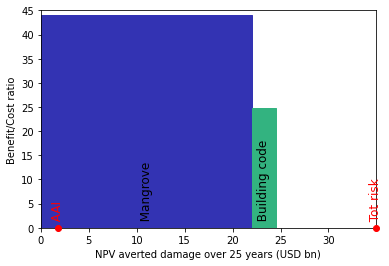

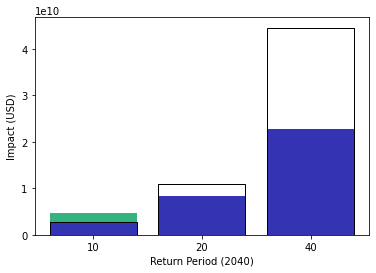

In [24]:
from climada.engine import CostBenefit

cost_ben = CostBenefit()
cost_ben.calc(haz, ent, future_year=2040) # prints costs and benefits
cost_ben.plot_cost_benefit() # plot cost benefit ratio and averted damage of every exposure
cost_ben.plot_event_view(return_per=(10, 20, 40)) # plot averted damage of each measure for every return period

This is just the start. Analyses improve as we add more adaptation measures into the mix.

Cost-benefit calculations can also include
- climate change, by specifying the `haz_future` parameter in `CostBenefit.calc()`
- changes to economic exposure over time (or to whatever exposure you're modelling) by specifying the `ent_future` parameter in `CostBenefit.calc()`
- different functions to calculate risk benefits. These are specified in `CostBenefit.calc()` and by default use changes to average annual impact
- linear, sublinear and superlinear evolution of impacts between the present and future, specified in the `imp_time_depen` parameter in `CostBenefit.calc()`

And once future hazards and exposures are defined, we can express changes to impacts over time as waterfall diagrams. See the CostBenefit class for more details.

> **Exercise:** repeat the above analysis, creating future climate hazards (see the first exercise), and future exposures based on projected economic growth. Visualise it with the `CostBenefit.plot_waterfall()` method.

## What next?

Thanks for following this tutorial! Take time to work on the exercises it suggested, or design your own risk analysis for your own topic. More detailed tutorials for individual classes were listed in the [Features](#CLIMADA-features) section.

Also, explore the full CLIMADA documentation and additional resources [described at the start of this document](#Resources-beyond-this-tutorial) to learn more about CLIMADA, its structure, its existing applications and how you can contribute.
